c:\Users\Gabriele\anaconda3\envs\trioma\Lib\site-packages\TRIOMA\tools\extractor.py:325: OptimizeWarning: Unknown solver options: xatol, fatol
  c_out = minimize(


Warning!: guessed length is not equal to the height. Double check your result 0.3884647925787861 1.0
TRIOMA eff is  0.09064680330058827
eff_res is  0.09064543298524239
err is  -1.3703153458888284e-06
Warning!: guessed length is not equal to the height. Double check your result 0.6114130710414398 2.0
TRIOMA eff is  0.13760468796272085
eff_res is  0.1376009549109149
err is  -3.7330518059541795e-06
Warning!: guessed length is not equal to the height. Double check your result 0.7413618000035669 3.0


c:\Users\Gabriele\anaconda3\envs\trioma\Lib\site-packages\TRIOMA\tools\extractor.py:125: RuntimeWarning: divide by zero encountered in divide
  return 1 / (


TRIOMA eff is  0.16355359186847818
eff_res is  0.1635447564912252
err is  -8.835377252963683e-06
Warning!: guessed length is not equal to the height. Double check your result 0.8181513502565361 4.0
TRIOMA eff is  0.17842979877701393
eff_res is  0.17839115711496037
err is  -3.864166205355679e-05
Warning!: guessed length is not equal to the height. Double check your result 0.8642498430072658 5.0
TRIOMA eff is  0.18720323817196216
eff_res is  0.18705797250673226
err is  -0.00014526566522990447


c:\Users\Gabriele\anaconda3\envs\trioma\Lib\site-packages\TRIOMA\tools\extractor.py:136: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral = integrate.quad(toint, c_out, c_in, points=c_out_max, maxp1=1e3)
c:\Users\Gabriele\anaconda3\envs\trioma\Lib\site-packages\TRIOMA\tools\extractor.py:136: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  integral = integrate.quad(toint, c_out, c_in, points=c_out_max, maxp1=1e3)


Warning!: guessed length is not equal to the height. Double check your result 0.9313400075262688 20.0
The sweep gas saturated
 Longer column would not increment the extraction efficiency
TRIOMA eff is  0.1997669686239799
eff_res is  0.19974975895958247
err is  -1.720966439744398e-05
Warning!: guessed length is not equal to the height. Double check your result 0.09579435202418954 0.2
TRIOMA eff is  0.023621421128658393
eff_res is  0.023621325133443203
err is  -9.599521519007559e-08
Warning!: guessed length is not equal to the height. Double check your result 0.18172223811041094 0.4
TRIOMA eff is  0.04401469660815538
eff_res is  0.04401438021482021
err is  -3.163933351701953e-07
Warning!: guessed length is not equal to the height. Double check your result 0.2585116061268037 0.6000000000000001
TRIOMA eff is  0.061713102168555856
eff_res is  0.06171247969375393
err is  -6.224748019256765e-07
Warning!: guessed length is not equal to the height. Double check your result 0.32712465406371183 0

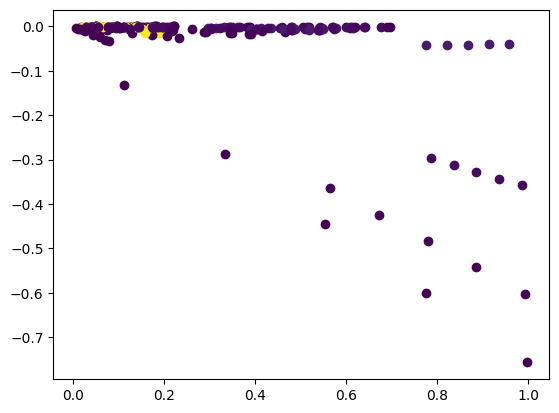

In [1]:
from TRIOMA.tools.component_tools import GLC,GLC_Gas,Fluid
import numpy as np 
import matplotlib.pyplot as plt
import mph 
R_const=8.31
T = [673, 673, 673, 673, 673]
Z = 0.8
R = 0.03
Q_l = np.array([
    80.0 * 1e-3 / 3600,
    40   * 1e-3 / 3600,
    40   * 1e-3 / 3600,
    40   * 1e-3 / 3600,
    40   * 1e-3 / 3600,
])
Q_gas=np.linspace(6* 1e-3 / 3600,100*1e-3/3600,5)
L_on_g=Q_l/Q_gas
p_in = [1275, 1050, 988, 463, 225]
# p_out = [796, 515, 484, 267, 130]
B_vec = []
kl_vec = []
K_S_Hq=8.9E-2
client=mph.start()
model = client.load('GenericMSGLC.mph')
p_in_g_v=np.linspace(0,200,5)
scatter_mat = np.empty((0, 5))
for p_in_g in p_in_g_v:
    for i in range(len(Q_gas)):
        SweepGas=GLC_Gas(G_gas=Q_gas[i],pg_in=p_in_g,p_tot=1.5E5)
        FLiBe=Fluid(Solubility=1.33E-4*np.exp(-1350/R_const/T[i]),MS=True )
        c_in=p_in[i]*FLiBe.Solubility
        Melodie=GLC(H=Z,R=R,c_in=p_in[i]*FLiBe.Solubility,fluid=FLiBe,GLC_gas=SweepGas,T=T[i],G_L=Q_l[i])
        Melodie.kla=1E-3
        height_v=[]
        err_v=[]
        Z_v=np.linspace(1,5,5)
        
        Z_v=np.append(Z_v,20)
        Z_v=np.append(Z_v,np.linspace(0.2,0.8,4))
        
        norm = plt.Normalize(min(Q_l/Q_gas), max(Q_l/Q_gas))
        for height in Z_v:
            Melodie.H=height
            Melodie.get_c_out()
            eff=Melodie.eff
            c_PbLi=56182
            flag_coms=1
            if isinstance(height,float) and flag_coms!=0:
                model.parameter("H",height)
                model.parameter("Ls",Q_l[i]*c_PbLi)
                model.parameter("Vs",Q_gas[i])
                model.parameter("R",R)
                model.parameter("c2_in",p_in_g/R_const/T[i])
                model.parameter("Kl_a",Melodie.kla)
                model.parameter("c_in",c_in)
                model.solve()
                eff_coms=model.evaluate("eff")
                eff_res=eff_coms
                err=eff_res-eff
                print("TRIOMA eff is ",eff)
                print("eff_res is ",eff_res)
                print("err is ",err)    
                err_v.append(err)
                plt.scatter( eff,err*100, c=Q_l[i]/Q_gas[i], cmap='viridis', norm=norm)
                new_row=np.array([height,p_in_g,Q_gas[i],err,eff])
                scatter_mat = np.vstack((scatter_mat, new_row))  # Append the new row

plt.show()


C:\Users\Gabriele\AppData\Local\Temp\ipykernel_11252\3758249595.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


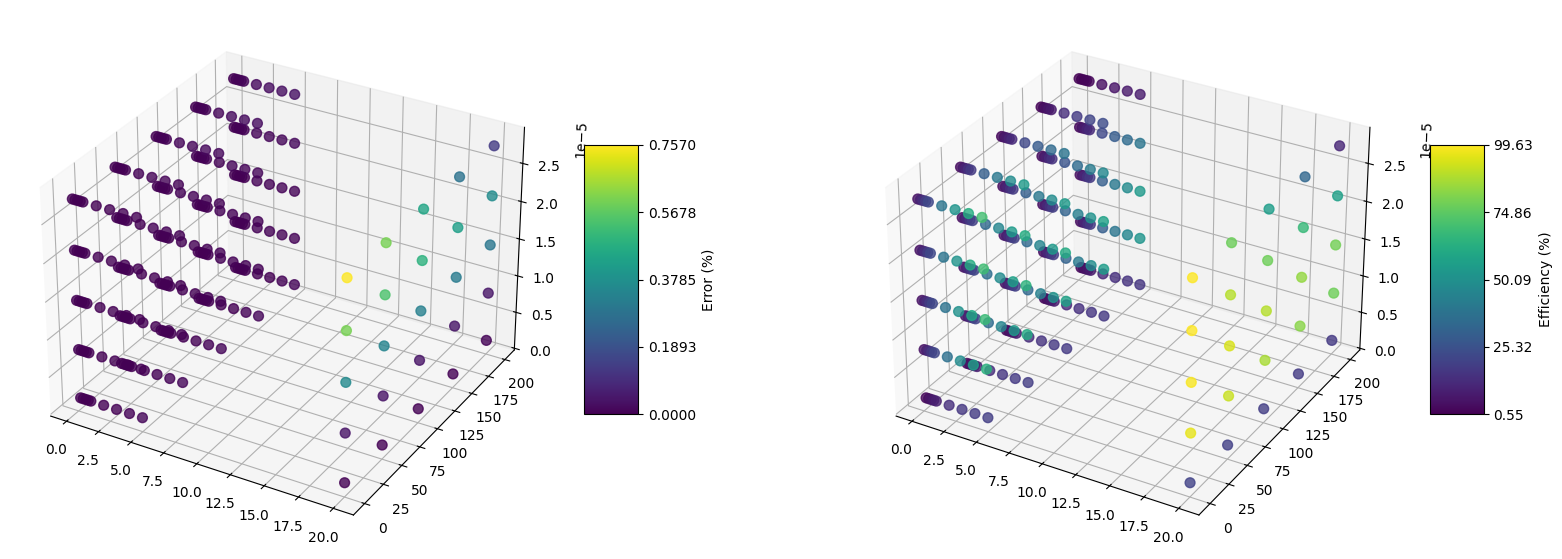

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
scatter_mat[:,3]=scatter_mat[:,3]*100
scatter_mat[:,4]=scatter_mat[:,4]*100
# Normalize the colors based on the values in scatter_mat[:, 3] and scatter_mat[:, 4]
cmap = cm.get_cmap('viridis')
norm1 = plt.Normalize(vmin=abs(scatter_mat[:, 3]).min(), vmax=abs(scatter_mat[:, 3]).max())
norm2 = plt.Normalize(vmin=abs(scatter_mat[:, 4]).min(), vmax=abs(scatter_mat[:, 4]).max())

colors1 = np.array([
    (1, 0, 0, 1) if value > 1 else cmap(norm1(value))  # (1, 0, 0, 1) is red in RGBA
    for value in abs(scatter_mat[:, 3])
])
colors2 = np.array([
    cmap(norm2(value))  # Normalize based on scatter_mat[:, 4]
    for value in abs(scatter_mat[:, 4])
])

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7), subplot_kw={'projection': '3d'})

# First subplot
sc1 = ax1.scatter(scatter_mat[:, 0], scatter_mat[:, 1], scatter_mat[:, 2], c=colors1, s=50, alpha=0.8)
cbar1 = plt.colorbar(cm.ScalarMappable(norm=norm1, cmap=cmap), ax=ax1, shrink=0.5, aspect=5)
cbar1.set_label('Error (%)')
# Set ticks in colorbar according to scatter_mat[:, 3]
cbar1.set_ticks(np.linspace(abs(scatter_mat[:, 3]).min(), abs(scatter_mat[:, 3]).max(), num=5))

# Second subplot
sc2 = ax2.scatter(scatter_mat[:, 0], scatter_mat[:, 1], scatter_mat[:, 2], c=colors2, s=50, alpha=0.8)
cbar2 = plt.colorbar(cm.ScalarMappable(norm=norm2, cmap=cmap), ax=ax2, shrink=0.5, aspect=5)
cbar2.set_label('Efficiency (%)')
# Set ticks in colorbar according to scatter_mat[:, 4]
cbar2.set_ticks(np.linspace(abs(scatter_mat[:, 4]).min(), abs(scatter_mat[:, 4]).max(), num=5))

#
plt.show()

In [3]:
print(max(abs(scatter_mat[:, 3])))

0.7570299262668279
